# Impact Of Covid-19 On Africa as 3/feb/2020

In [2]:
# Loading the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# loading the data
df = pd.read_csv("/home/antonnymuiko/Documents/python/web_scrapping/wikipedia_covid/covid_data.csv")
df.head()

,Unnamed: 0,Country,Confirmed cases,Active confirmed cases,Recoveries,Deaths,Ref.
0,0,South Africa,"1,458,958","95,508","1,318,504","44,946","<a href=""#cite_note-coronacount-1"">[1]</a>"
1,1,Morocco,"473,047","12,944","451,780","8,323","<a href=""#cite_note-coronacount-1"">[1]</a>"
2,2,Tunisia,"211,412","39,452","165,067","6,893","<a href=""#cite_note-coronacount-1"">[1]</a>"
3,3,Egypt,"167,013","27,092","130,514","9,407","<a href=""#cite_note-coronacount-1"">[1]</a>"
4,4,Ethiopia,"139,408","13,298","123,988","2,122","<a href=""#cite_note-coronacount-1"">[1]</a>"


## Data Preparation

In [4]:
# drop uncessary columns
def drop_columns(data):
    data.drop(["Unnamed: 0","Ref."], axis = 1, inplace = True )
    return data.head()


drop_columns(df)


,Country,Confirmed cases,Active confirmed cases,Recoveries,Deaths
0,South Africa,"1,458,958","95,508","1,318,504","44,946"
1,Morocco,"473,047","12,944","451,780","8,323"
2,Tunisia,"211,412","39,452","165,067","6,893"
3,Egypt,"167,013","27,092","130,514","9,407"
4,Ethiopia,"139,408","13,298","123,988","2,122"


In [5]:
# replace the comma in numeric columns
numerical_columns = ["Confirmed cases", "Active confirmed cases", "Recoveries", "Deaths"]
def remove_comma(data, cols):
    for col in cols:
        data[col].replace(",","", regex=True, inplace = True)

    return data.head()

remove_comma(df,numerical_columns)    

,Country,Confirmed cases,Active confirmed cases,Recoveries,Deaths
0,South Africa,1458958,95508,1318504,44946
1,Morocco,473047,12944,451780,8323
2,Tunisia,211412,39452,165067,6893
3,Egypt,167013,27092,130514,9407
4,Ethiopia,139408,13298,123988,2122


In [6]:
# data types
def data_types(data):
    types = df.dtypes

    return types


data_types(df)

Country                   object
Confirmed cases           object
Active confirmed cases    object
Recoveries                object
Deaths                    object
dtype: object

In [7]:
# Convert the data types from object to int 
def convert_dtypes(data, cols):
    for col in cols:
        data[col] = data[col].astype('int64')
    
    return data.dtypes


convert_dtypes(df, numerical_columns)

Country                   object
Confirmed cases            int64
Active confirmed cases     int64
Recoveries                 int64
Deaths                     int64
dtype: object

## Positive Confirmed Cases

In [73]:
def postive(data, var, sort):

    # slice the data
    positive = data[data.columns[0:2]]

    # calculate the percentage of a country compared to total of continent
    positive["Percentage(%) of the Total" ] = (positive["Confirmed cases"])/(positive["Confirmed cases"].sum())

    positive.sort_values("Confirmed cases",ascending=sort, na_position='last', inplace=True)

    most = positive.head(10)

    new = pd.DataFrame(most)
    
    print()

    sns.set_style("whitegrid")

    bar,ax = plt.subplots(figsize=(16,12))

    if sort == True:

        ax = sns.barplot(x = var, y = "Country", data = most, ci=None, palette="muted",orient='h')
        quantity = "Least"
        ax.set_title(f"Countries With {quantity} Positive Cases", fontsize = 22)
        ax.set_xlabel ("Countries", fontsize = 18)
        ax.set_ylabel ('Confirmed Cases', fontsize = 18)
        plt.yticks(fontsize=14)
        bar.savefig(f"{quantity}_positive.png")

    else:
        ax = sns.barplot(x = "Country", y = var, data = most, ci=None, palette="muted",orient='v')
        quantity = "Most"
        ax.set_title(f"Countries With {quantity} Positive Cases", fontsize = 22)
        ax.set_xlabel ("Countries", fontsize = 18)
        plt.xticks(rotation='60', fontsize=14)
        ax.set_ylabel ('Confirmed Cases', fontsize = 18)
        bar.savefig(f"{quantity}_positive.png")

    # display value
    #for rect in ax.patches:
    #    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )

    plt.show

    return most

## Countries with Most Positive Confirmed Cases

,Country,Confirmed cases,Percentage(%) of the Total
0,South Africa,1458958,0.403130
1,Morocco,473047,0.130709
2,Tunisia,211412,0.058416
3,Egypt,167013,0.046148
4,Ethiopia,139408,0.038520
5,Nigeria,133552,0.036902
6,Libya,121243,0.033501
7,Algeria,107841,0.029798
8,Kenya,101159,0.027952
9,Ghana,67782,0.018729


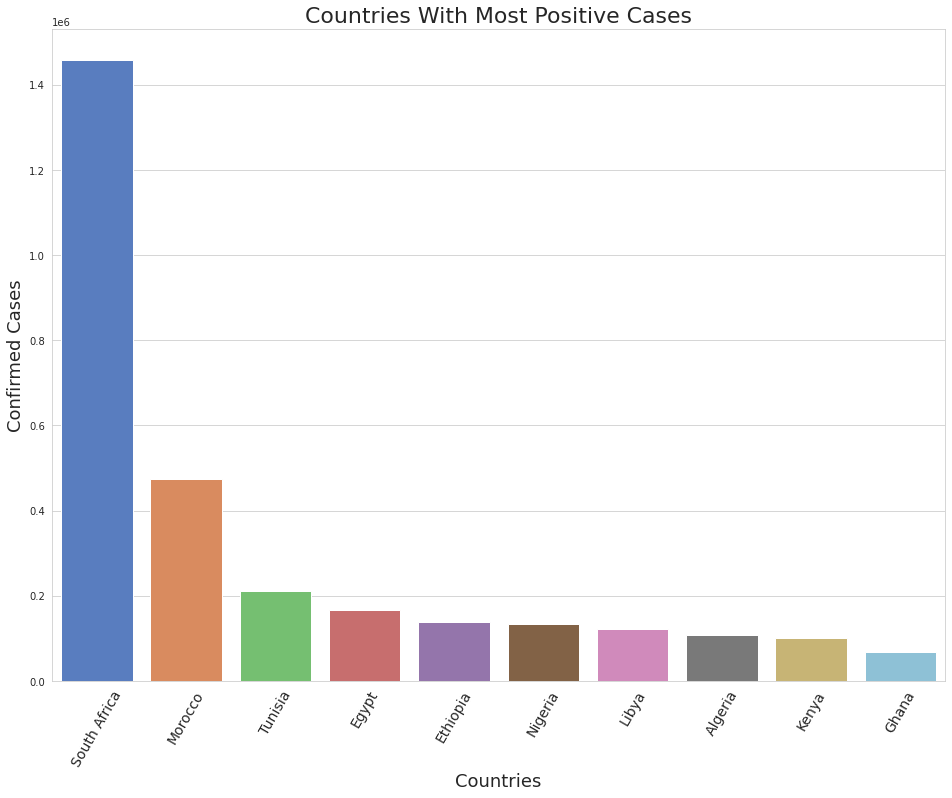

In [74]:
postive(df, "Confirmed cases", False)

## Countries with Least Positive Confirmed Cases

,Country,Confirmed cases,Percentage(%) of the Total
56,Western Sahara,10,0.000003
55,Tanzania,509,0.000141
54,Mauritius,583,0.000161
53,Seychelles,1243,0.000343
52,São Tomé and Principe,1283,0.000355
51,Burundi,1641,0.000453
50,Liberia,1945,0.000537
49,Eritrea,2309,0.000638
47,Guinea-Bissau,2634,0.000728
48,Comoros,2848,0.000787


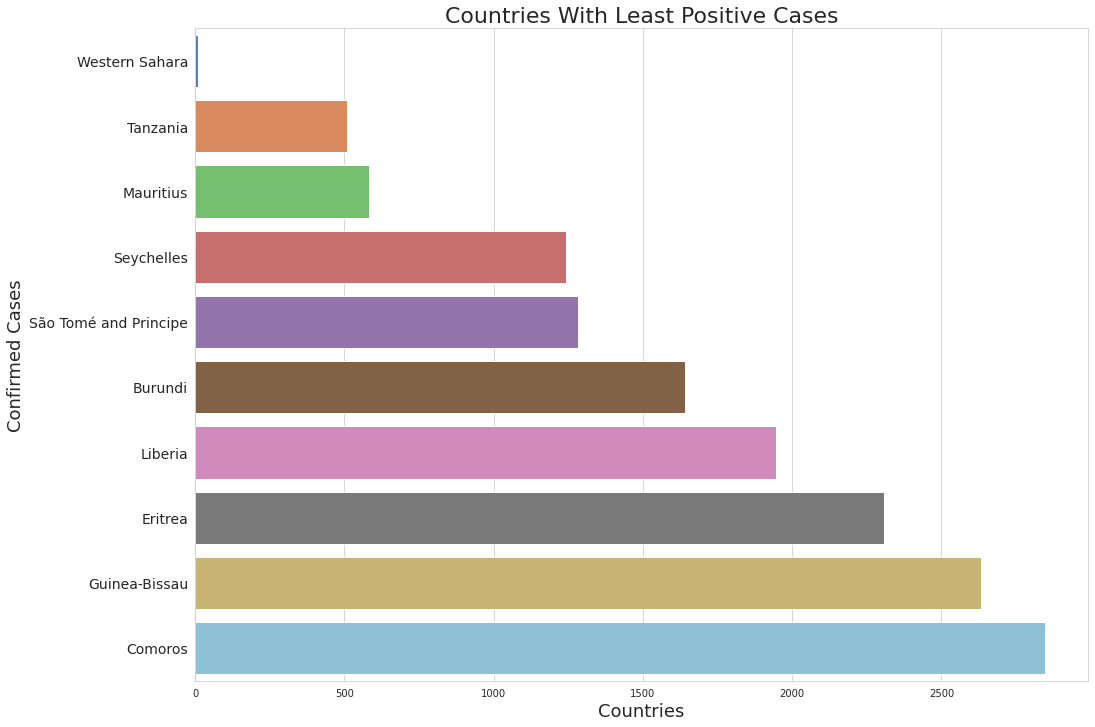

In [75]:
postive(df, "Confirmed cases", True)

## Recovery Rate

* This is the number of the patients recorved compared to the total positive cases

In [194]:
def recovery(data, var, rate, quantity):

    # the ratio of recoveries compared to confirmed cases
    data['Recovery Rate'] = data[var]/df[rate]

    # filter the columns
    recover = data[["Country", "Recoveries", "Recovery Rate"]]
    
    # Sort according to the number of recoveries
    recover.sort_values("Recoveries", ascending=False, inplace=True)
    recover.reset_index(drop=True, inplace=True)

    #
    if quantity == "Highest":
        high = recover.head(29)
    elif quantity == "Lowest":
        high = recover.tail(28)
    
    sns.set_style("whitegrid")

    bar,ax = plt.subplots(figsize=(18,12))

    ax = sns.pointplot(x="Country",y='Recovery Rate',data=high, color="w")

    ax.set_facecolor("k")

    plt.grid(True,color="grey",alpha=0.1)

    ax.set_title(f"Recovery Rate of Countries with {quantity} Recoveries", fontsize = 22)

    ax.set_xlabel ("Countries", fontsize = 18)

    ax.set_ylabel ('Recovery Rate', fontsize = 18)

    plt.xticks(rotation=90, fontsize=14)

    plt.show

    if quantity == "Highest":
        bar.savefig(f"{quantity}_recoveries.png")
    elif quantity == "Lowest":
        bar.savefig(f"{quantity}_recoveries.png")


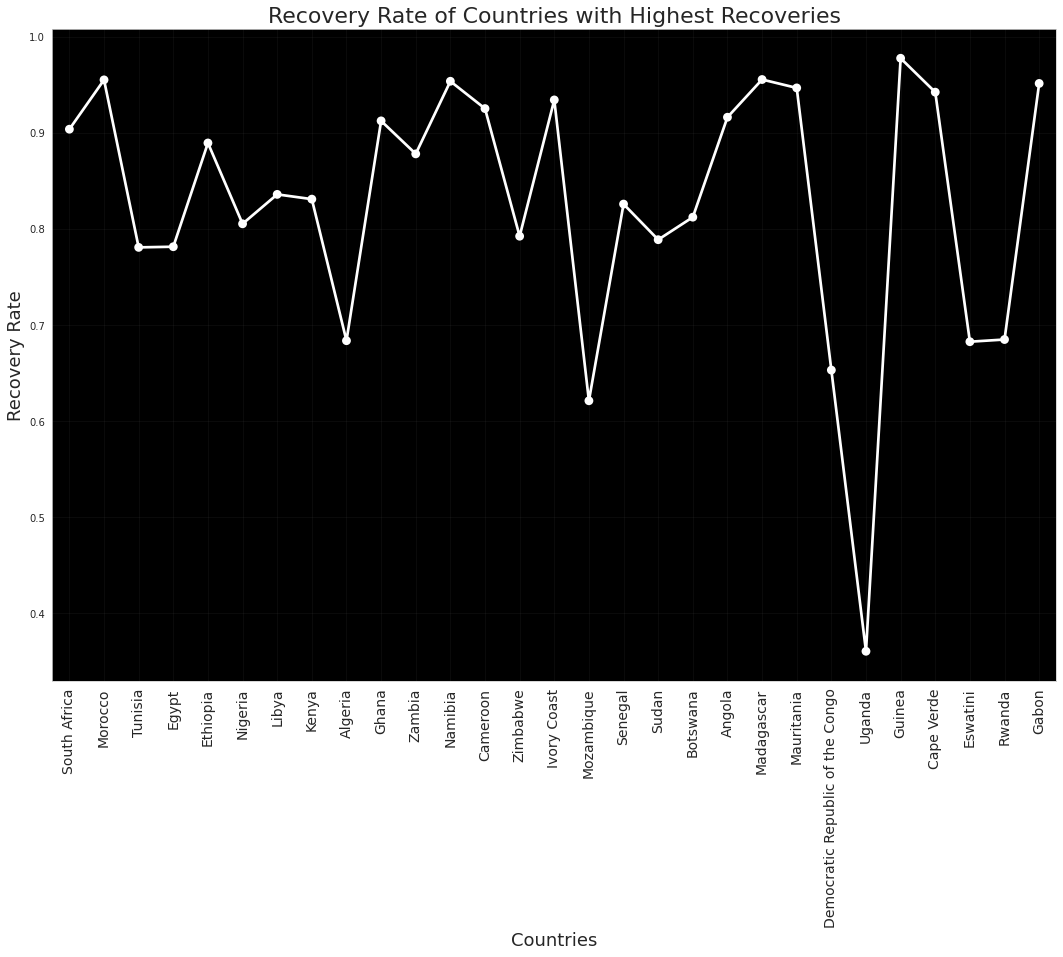

In [195]:
recovery(df, "Recoveries", "Confirmed cases", "Highest")

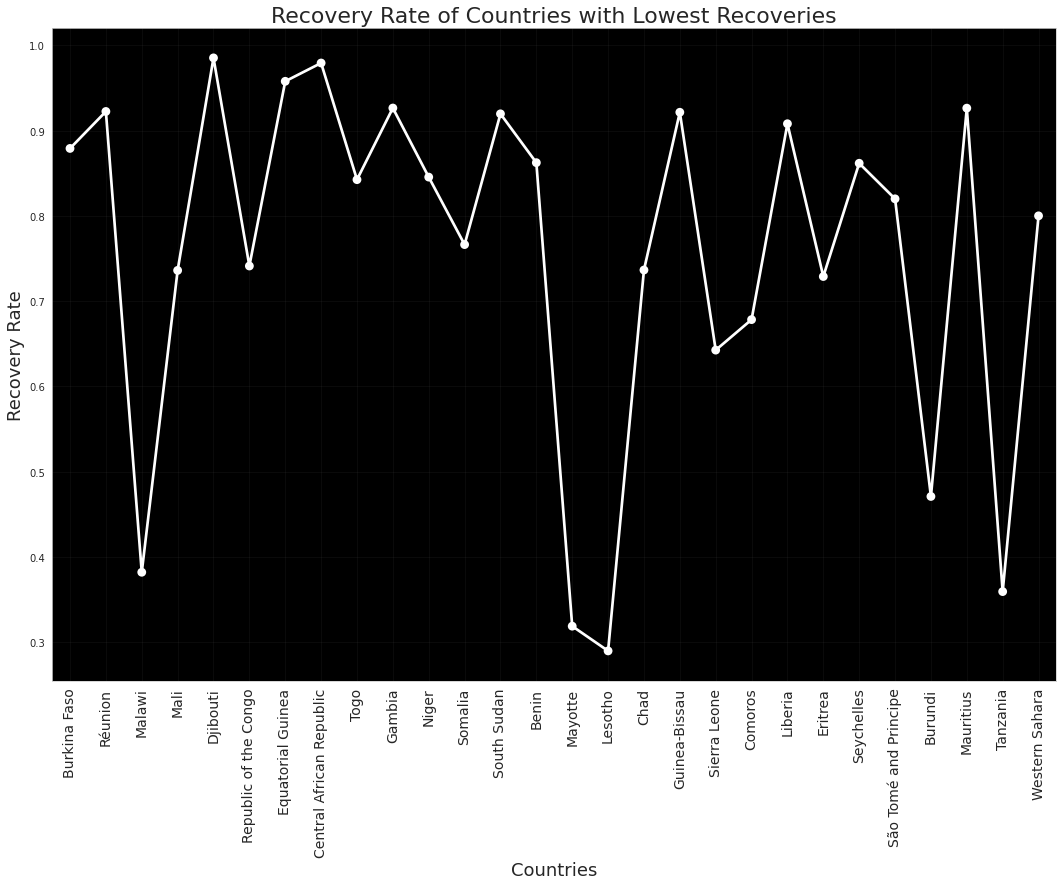

In [196]:
recovery(df, "Recoveries", "Confirmed cases", "Lowest")

## Countries with highest Recovery Rate

## Countries with the Lowest Recovery Rate

## Countries with the Highest Death Rate

## Countries with the Lowest Death Rate

## Countries With the Most Active Cases

## Countries With the Least Active Cases

In [ ]:
https://towardsdatascience.com/3-lines-of-python-code-to-create-an-interactive-playable-covid-19-bubble-map-74807939e887